In [64]:
import datetime as dt
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt

In [3]:
# read function csv
def read_csv(file_name):
    df = pd.read_csv(file_name, index_col=0)

    return df

df = read_csv('DOGE-volume-filtered.csv')
df['date_timestamp'] = df['time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [38]:
print(df.head())
df = df.sort_values(by='date_timestamp')

                  time        volume      date_timestamp
0  2022-01-24 02:00:00  1.041467e+10 2022-01-24 02:00:00
1  2022-01-24 03:00:00  8.243907e+09 2022-01-24 03:00:00
2  2022-01-24 04:00:00  9.401602e+09 2022-01-24 04:00:00
3  2022-01-24 05:00:00  1.036768e+10 2022-01-24 05:00:00
4  2022-01-24 06:00:00  8.337658e+09 2022-01-24 06:00:00


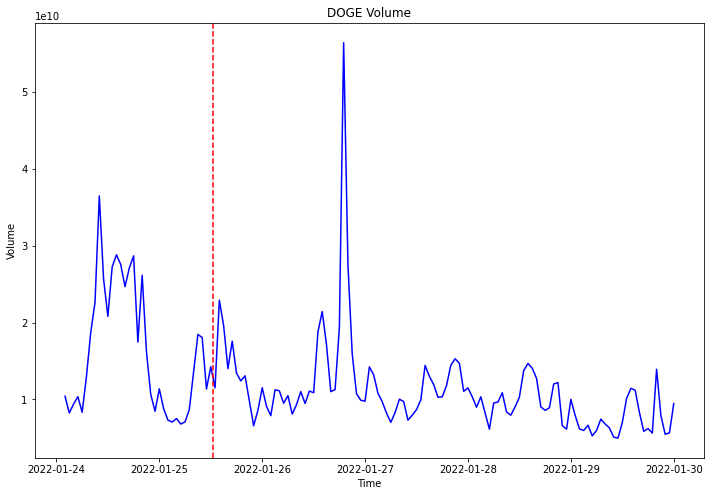

In [39]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(df['date_timestamp'], df['volume'], color='blue', label='volume')
ax.axvline(x=datetime(2022, 1, 25, 12, 30), color='red', linestyle='--', label='25-01-2022 12:30')
ax.set_xlabel('Time')
ax.set_ylabel('Volume')
ax.set_title('DOGE Volume')
plt.show()

In [20]:
df_score = read_csv('25.01.2022_Mc-x-DOGE/raw_hourly_df.csv')
df_score.reset_index(inplace=True)
df_score['date_timestamp'] = df_score['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M'))


print(df_score.head())
print(df.head())

               date   compund  positive  negative   neutral         score  \
0  2022-01-23 15:00  0.144151  0.075913  0.017577  0.906505  1.159756e-06   
1  2022-01-23 16:00  0.207618  0.097342  0.012581  0.890082  9.152689e-08   
2  2022-01-23 17:00  0.222341  0.113804  0.020304  0.865876  3.661306e-07   
3  2022-01-23 18:00  0.326939  0.175066  0.040029  0.784699  6.558588e-06   
4  2022-01-23 19:00  0.363474  0.177892  0.025123  0.796913  2.900662e-06   

       date_timestamp  
0 2022-01-23 15:00:00  
1 2022-01-23 16:00:00  
2 2022-01-23 17:00:00  
3 2022-01-23 18:00:00  
4 2022-01-23 19:00:00  
                    time        volume      date_timestamp
142  2022-01-30 00:00:00  9.460801e+09 2022-01-30 00:00:00
141  2022-01-29 23:00:00  5.658370e+09 2022-01-29 23:00:00
140  2022-01-29 22:00:00  5.468148e+09 2022-01-29 22:00:00
139  2022-01-29 21:00:00  7.932699e+09 2022-01-29 21:00:00
138  2022-01-29 20:00:00  1.393347e+10 2022-01-29 20:00:00


In [28]:
# merge df and df_score on date_timestamp
df_merged = pd.merge(df, df_score, on='date_timestamp', how='inner')

In [29]:
df_merged = df_merged[['date_timestamp', 'volume', 'score']]

In [30]:
print(df_merged.head())

# initialise MinMaxScaler 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# normalise volume and score
df_merged['volume_norm'] = scaler.fit_transform(df_merged['volume'].values.reshape(-1, 1))
df_merged['score_norm'] = scaler.fit_transform(df_merged['score'].values.reshape(-1, 1))

print(df_merged.head())


       date_timestamp        volume         score
0 2022-01-30 00:00:00  9.460801e+09  2.999990e-07
1 2022-01-29 23:00:00  5.658370e+09 -2.225529e-07
2 2022-01-29 22:00:00  5.468148e+09  1.197643e-07
3 2022-01-29 21:00:00  7.932699e+09 -9.252055e-08
4 2022-01-29 20:00:00  1.393347e+10 -4.621335e-07
       date_timestamp        volume         score  volume_norm  score_norm
0 2022-01-30 00:00:00  9.460801e+09  2.999990e-07     0.087103    0.183646
1 2022-01-29 23:00:00  5.658370e+09 -2.225529e-07     0.013176    0.150283
2 2022-01-29 22:00:00  5.468148e+09  1.197643e-07     0.009478    0.172138
3 2022-01-29 21:00:00  7.932699e+09 -9.252055e-08     0.057394    0.158585
4 2022-01-29 20:00:00  1.393347e+10 -4.621335e-07     0.174061    0.134986


In [43]:
# sort df_merged by date_timestamp
df_merged = df_merged.sort_values(by='date_timestamp')

# keep lines after 2022-01-25 10:00:00
df_merged = df_merged[df_merged['date_timestamp'] > datetime(2022, 1, 25, 10, 0)]

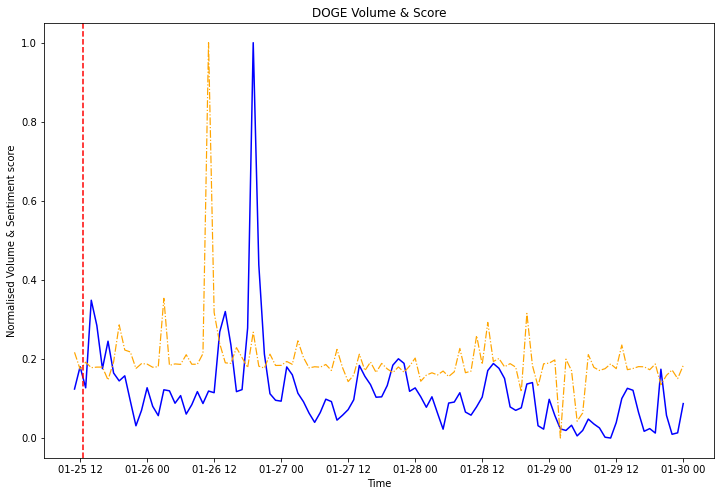

In [46]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(df_merged['date_timestamp'], df_merged['volume_norm'], color='blue', label='Volume', linewidth=1.5)
ax.plot(df_merged['date_timestamp'], df_merged['score_norm'], color='orange', label='score', linestyle='-.', linewidth=1.2)
ax.axvline(x=datetime(2022, 1, 25, 12, 30), color='red', linestyle='--', label='25-01-2022 12:30')
ax.set_xlabel('Time')
ax.set_ylabel('Normalised Volume & Sentiment score')
ax.set_title('DOGE Volume & Score')
plt.show()

In [89]:
# find max of score and save date_timestamp
max_score = df_merged['score_norm'].max()
max_score_date = df_merged[df_merged['score_norm'] == max_score]['date_timestamp'].values[0]
max_score_dt = dt.datetime.utcfromtimestamp(int(max_score_date)/1e9)

# find max of volume and save date_timestamp
max_volume = df_merged['volume_norm'].max()
max_volume_date = df_merged[df_merged['volume_norm'] == max_volume]['date_timestamp'].values[0]
max_volume_dt = dt.datetime.utcfromtimestamp(int(max_volume_date)/1e9)

print('Max score:', max_score, 'at', max_score_dt)
print('Max volume:', max_volume, 'at', max_volume_dt)
print('Difference between max score and max volume in hours is:', abs(max_volume_dt - max_score_dt))

Max score: 0.9999999999999999 at 2022-01-26 11:00:00
Max volume: 1.0 at 2022-01-26 19:00:00
Difference between max score and max volume in hours is: 8:00:00
